In [2]:
import matplotlib.pyplot as plt #https://matplotlib.org/
import numpy as np #https://numpy.org/
import pandas as pd #https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html
import seaborn as sns #https://seaborn.pydata.org/

In [3]:
advertisingdf = pd.read_csv("advertising.csv", header='infer')
advertisingdf.columns = ['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage', 'AdTopicLine', 
                         'City', 'Male', 'Country', 'Timestamp', 'ClickedonAd']
advertisingdf['Agetimes2'] = advertisingdf['Age'].apply(lambda x: x * 2)
advertisingdf['Agepower2'] = advertisingdf['Age'].apply(lambda x: x ** 2)
advertisingdf['Totalallagecols'] = advertisingdf.apply(lambda x: x['Age'] + x['Agepower2'] + x['Agetimes2'], axis = 1)
advertisingdf['SerialIndex'] = advertisingdf.index
advertisingdf['Indexto2'] = advertisingdf.index ** 2
advertisingdf.head(2)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd,Agetimes2,Agepower2,Totalallagecols,SerialIndex,Indexto2
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 00:53,0,70,1225,1330,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 01:39,0,62,961,1054,1,1


# Pandas Dataframe Basic Visualizations

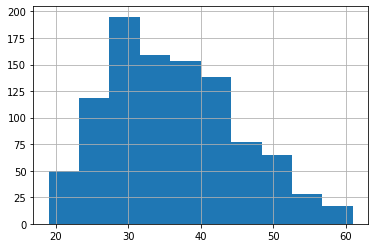

In [4]:
advertisingdf['Age'].hist()

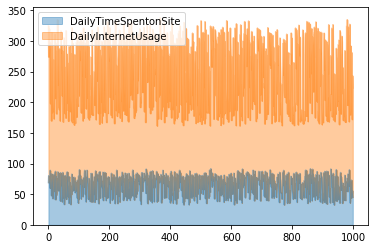

In [5]:
advertisingdf[['DailyTimeSpentonSite','DailyInternetUsage']].plot.area(alpha=0.4)

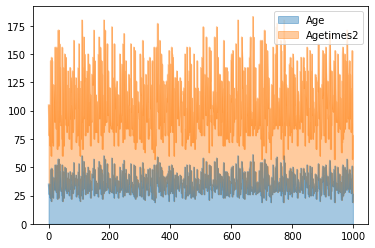

In [6]:
advertisingdf[['Age','Agetimes2']].plot.area(alpha=0.4) # e.g. Total Revenue = Operating Revenue, Other Revenue, Interest Revenue

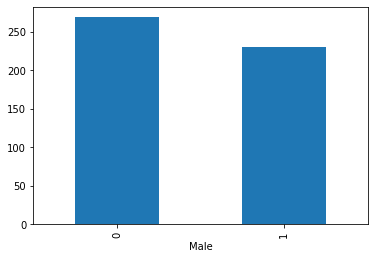

In [7]:
advertisingdf.groupby('Male')['ClickedonAd'].sum().plot.bar()

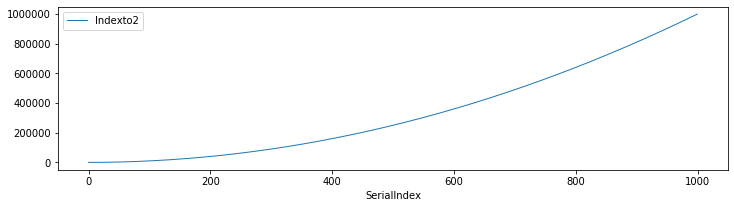

In [8]:
advertisingdf['SerialIndex'] = advertisingdf.index
advertisingdf['Indexto2'] = advertisingdf.index ** 2
advertisingdf.plot.line(x='SerialIndex',y='Indexto2',figsize=(12,3),lw=1)

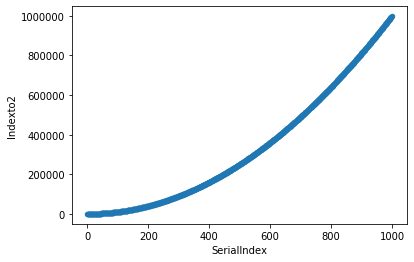

In [9]:
advertisingdf.plot.scatter(x='SerialIndex',y='Indexto2')

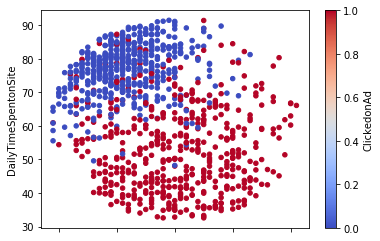

In [10]:
advertisingdf.plot.scatter(x='Age',y='DailyTimeSpentonSite',c='ClickedonAd',cmap='coolwarm')

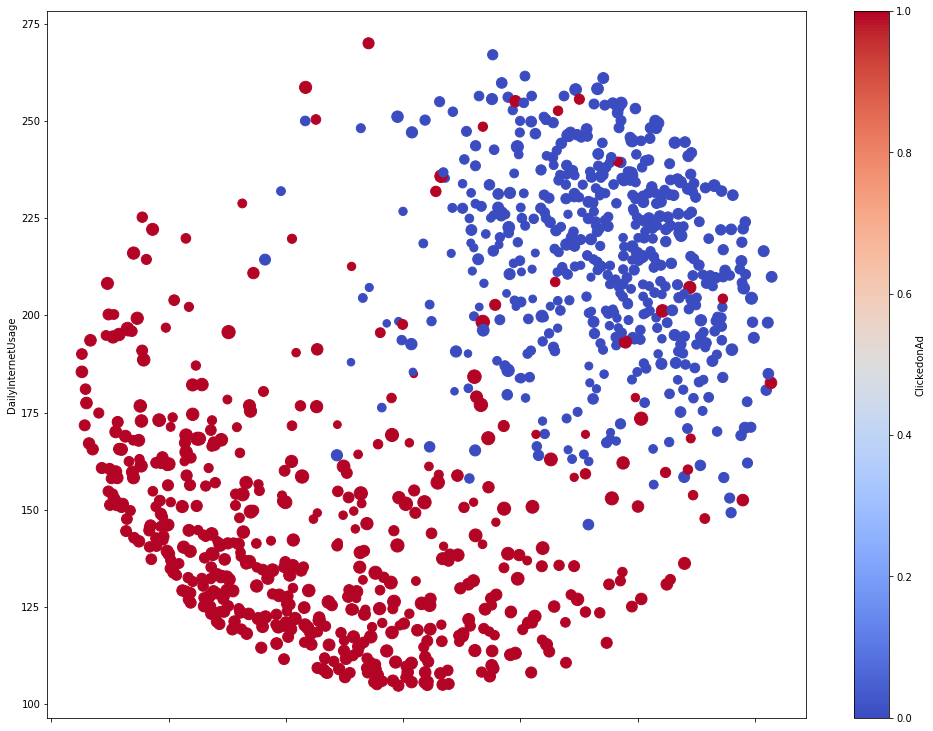

In [11]:
advertisingdf.plot.scatter(x='DailyTimeSpentonSite',y='DailyInternetUsage',s=advertisingdf['Age']*3,figsize=(17,13),c='ClickedonAd',cmap='coolwarm')

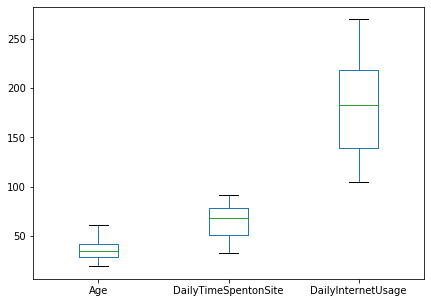

In [12]:
advertisingdf[['Age','DailyTimeSpentonSite','DailyInternetUsage']].plot.box(figsize = (7,5)) # Can also pass a by= argument for groupby

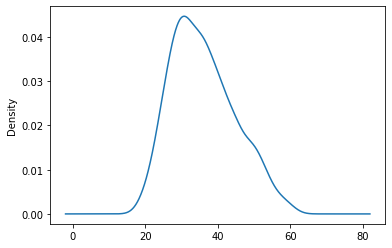

In [13]:
advertisingdf['Age'].plot.kde()

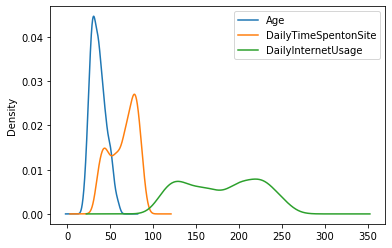

In [14]:
advertisingdf[['Age','DailyTimeSpentonSite','DailyInternetUsage']].plot.density()

# Using Seaborn

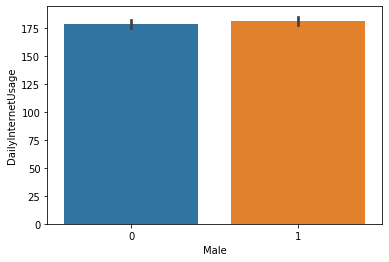

In [15]:
sns.barplot(x='Male',y='DailyInternetUsage',data=advertisingdf)

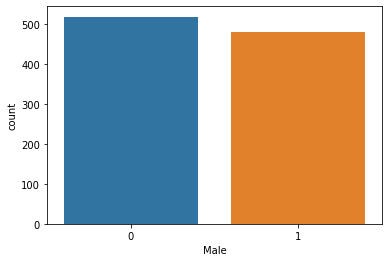

In [16]:
sns.countplot(x='Male',data=advertisingdf)

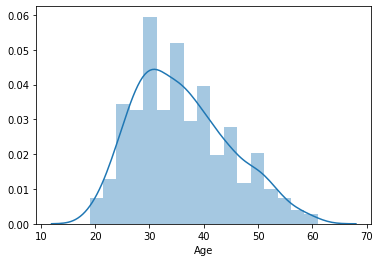

In [17]:
sns.distplot(advertisingdf['Age'], kde = True)  #kernel density estimate to make it a proportion of total

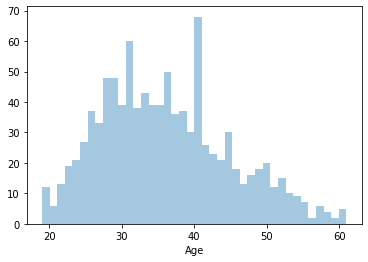

In [18]:
sns.distplot(advertisingdf['Age'],kde=False,bins=40) #bins = 17 is above

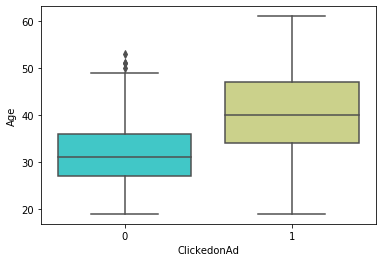

In [19]:
sns.boxplot(x="ClickedonAd", y="Age", data=advertisingdf,palette='rainbow') #,orient='h'

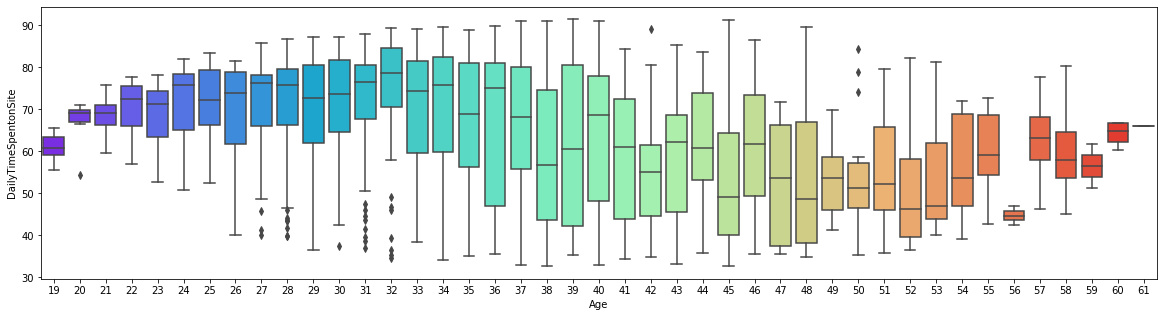

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x="Age", y="DailyTimeSpentonSite", data=advertisingdf,palette='rainbow') #,orient='h'

In [21]:
advertisingdf['QuartileAge_rank'] = pd.qcut(advertisingdf['Age'], 4, labels = False, duplicates = 'drop') 
advertisingdf['DecileAge_rank'] = pd.qcut(advertisingdf['Age'], 10, labels = False, duplicates = 'drop') 
advertisingdf['PercentileAge_rank'] = pd.qcut(advertisingdf['Age'], 100, labels = False, duplicates = 'drop') 

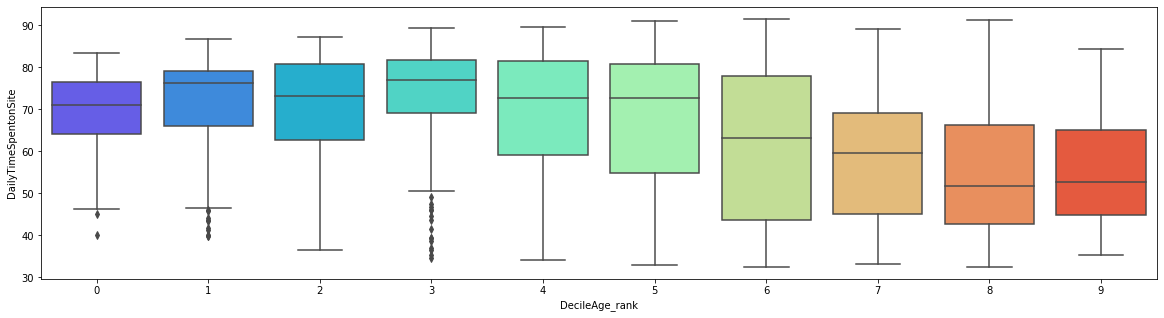

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(x="DecileAge_rank", y="DailyTimeSpentonSite", data=advertisingdf,palette='rainbow') #,orient='h'

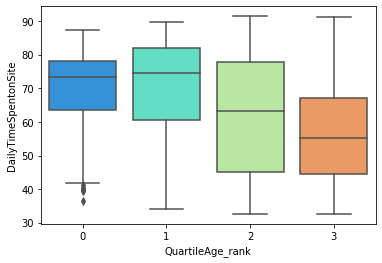

In [23]:
sns.boxplot(x="QuartileAge_rank", y="DailyTimeSpentonSite", data=advertisingdf,palette='rainbow') #,orient='h'

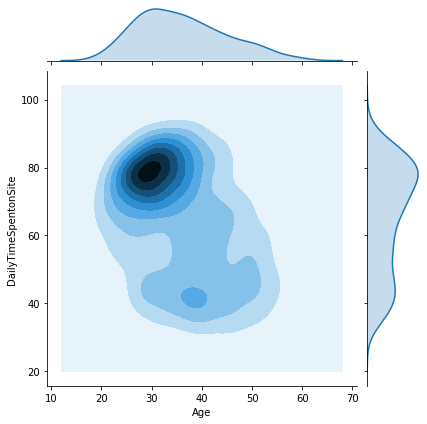

In [24]:
sns.jointplot(x='Age',y='DailyTimeSpentonSite',data=advertisingdf,kind='kde') #“scatter”, “reg”, “resid”, “kde”, “hex”

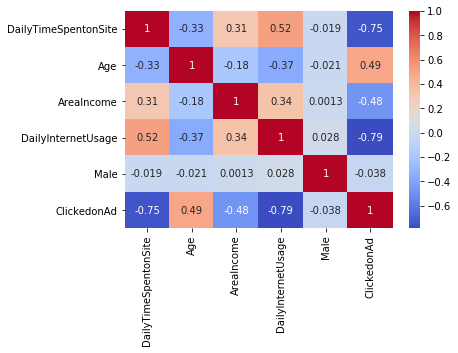

In [25]:
sns.heatmap(advertisingdf[['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage', 
                           'Male', 'ClickedonAd']].corr(),cmap='coolwarm',annot=True)

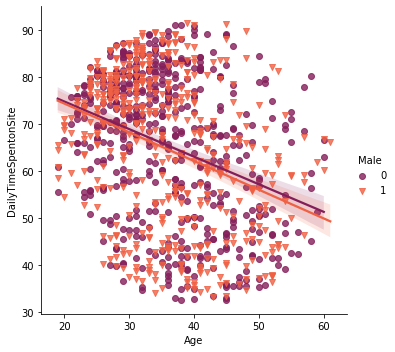

In [26]:
sns.lmplot(x='Age',y='DailyTimeSpentonSite',data=advertisingdf,hue='Male',palette='rocket', markers=['o','v']) 
#palettemako, flare, crest, paired

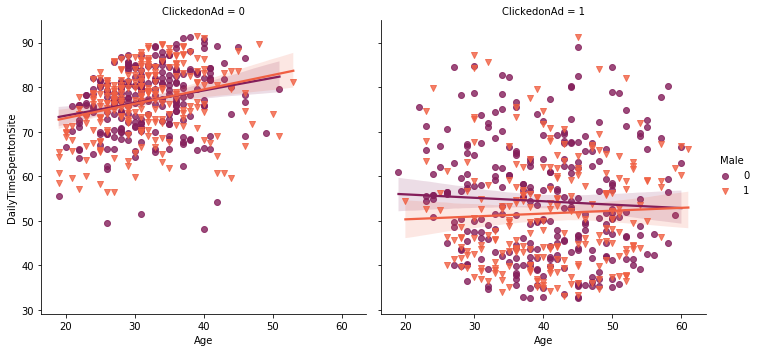

In [27]:
sns.lmplot(x='Age',y='DailyTimeSpentonSite',data=advertisingdf,hue='Male',palette='rocket', markers=['o','v'],col='ClickedonAd') 
#palettemako, flare, crest, paired

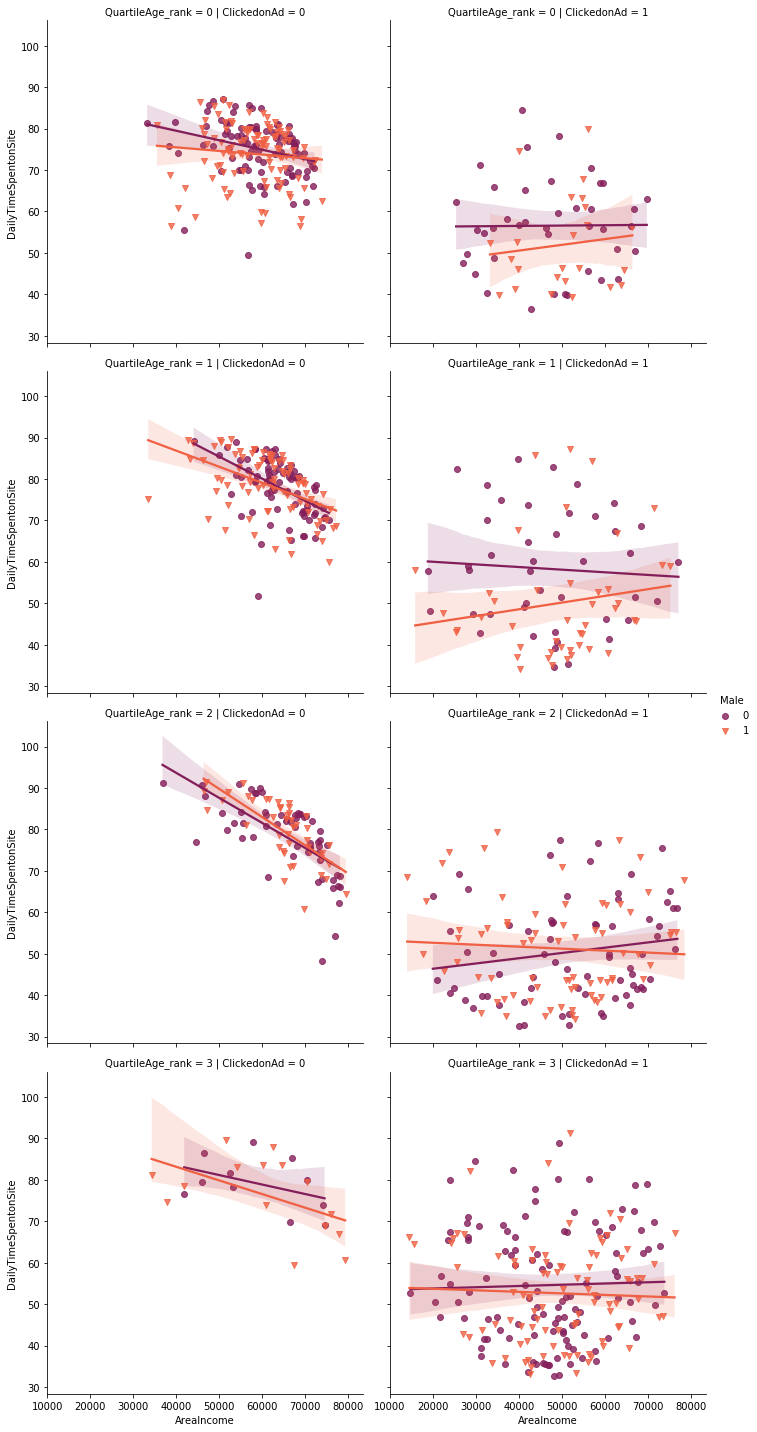

In [28]:
sns.lmplot(x='AreaIncome',y='DailyTimeSpentonSite',data=advertisingdf,hue='Male',palette='rocket', markers=['o','v'],col='ClickedonAd',
           row= 'QuartileAge_rank') 

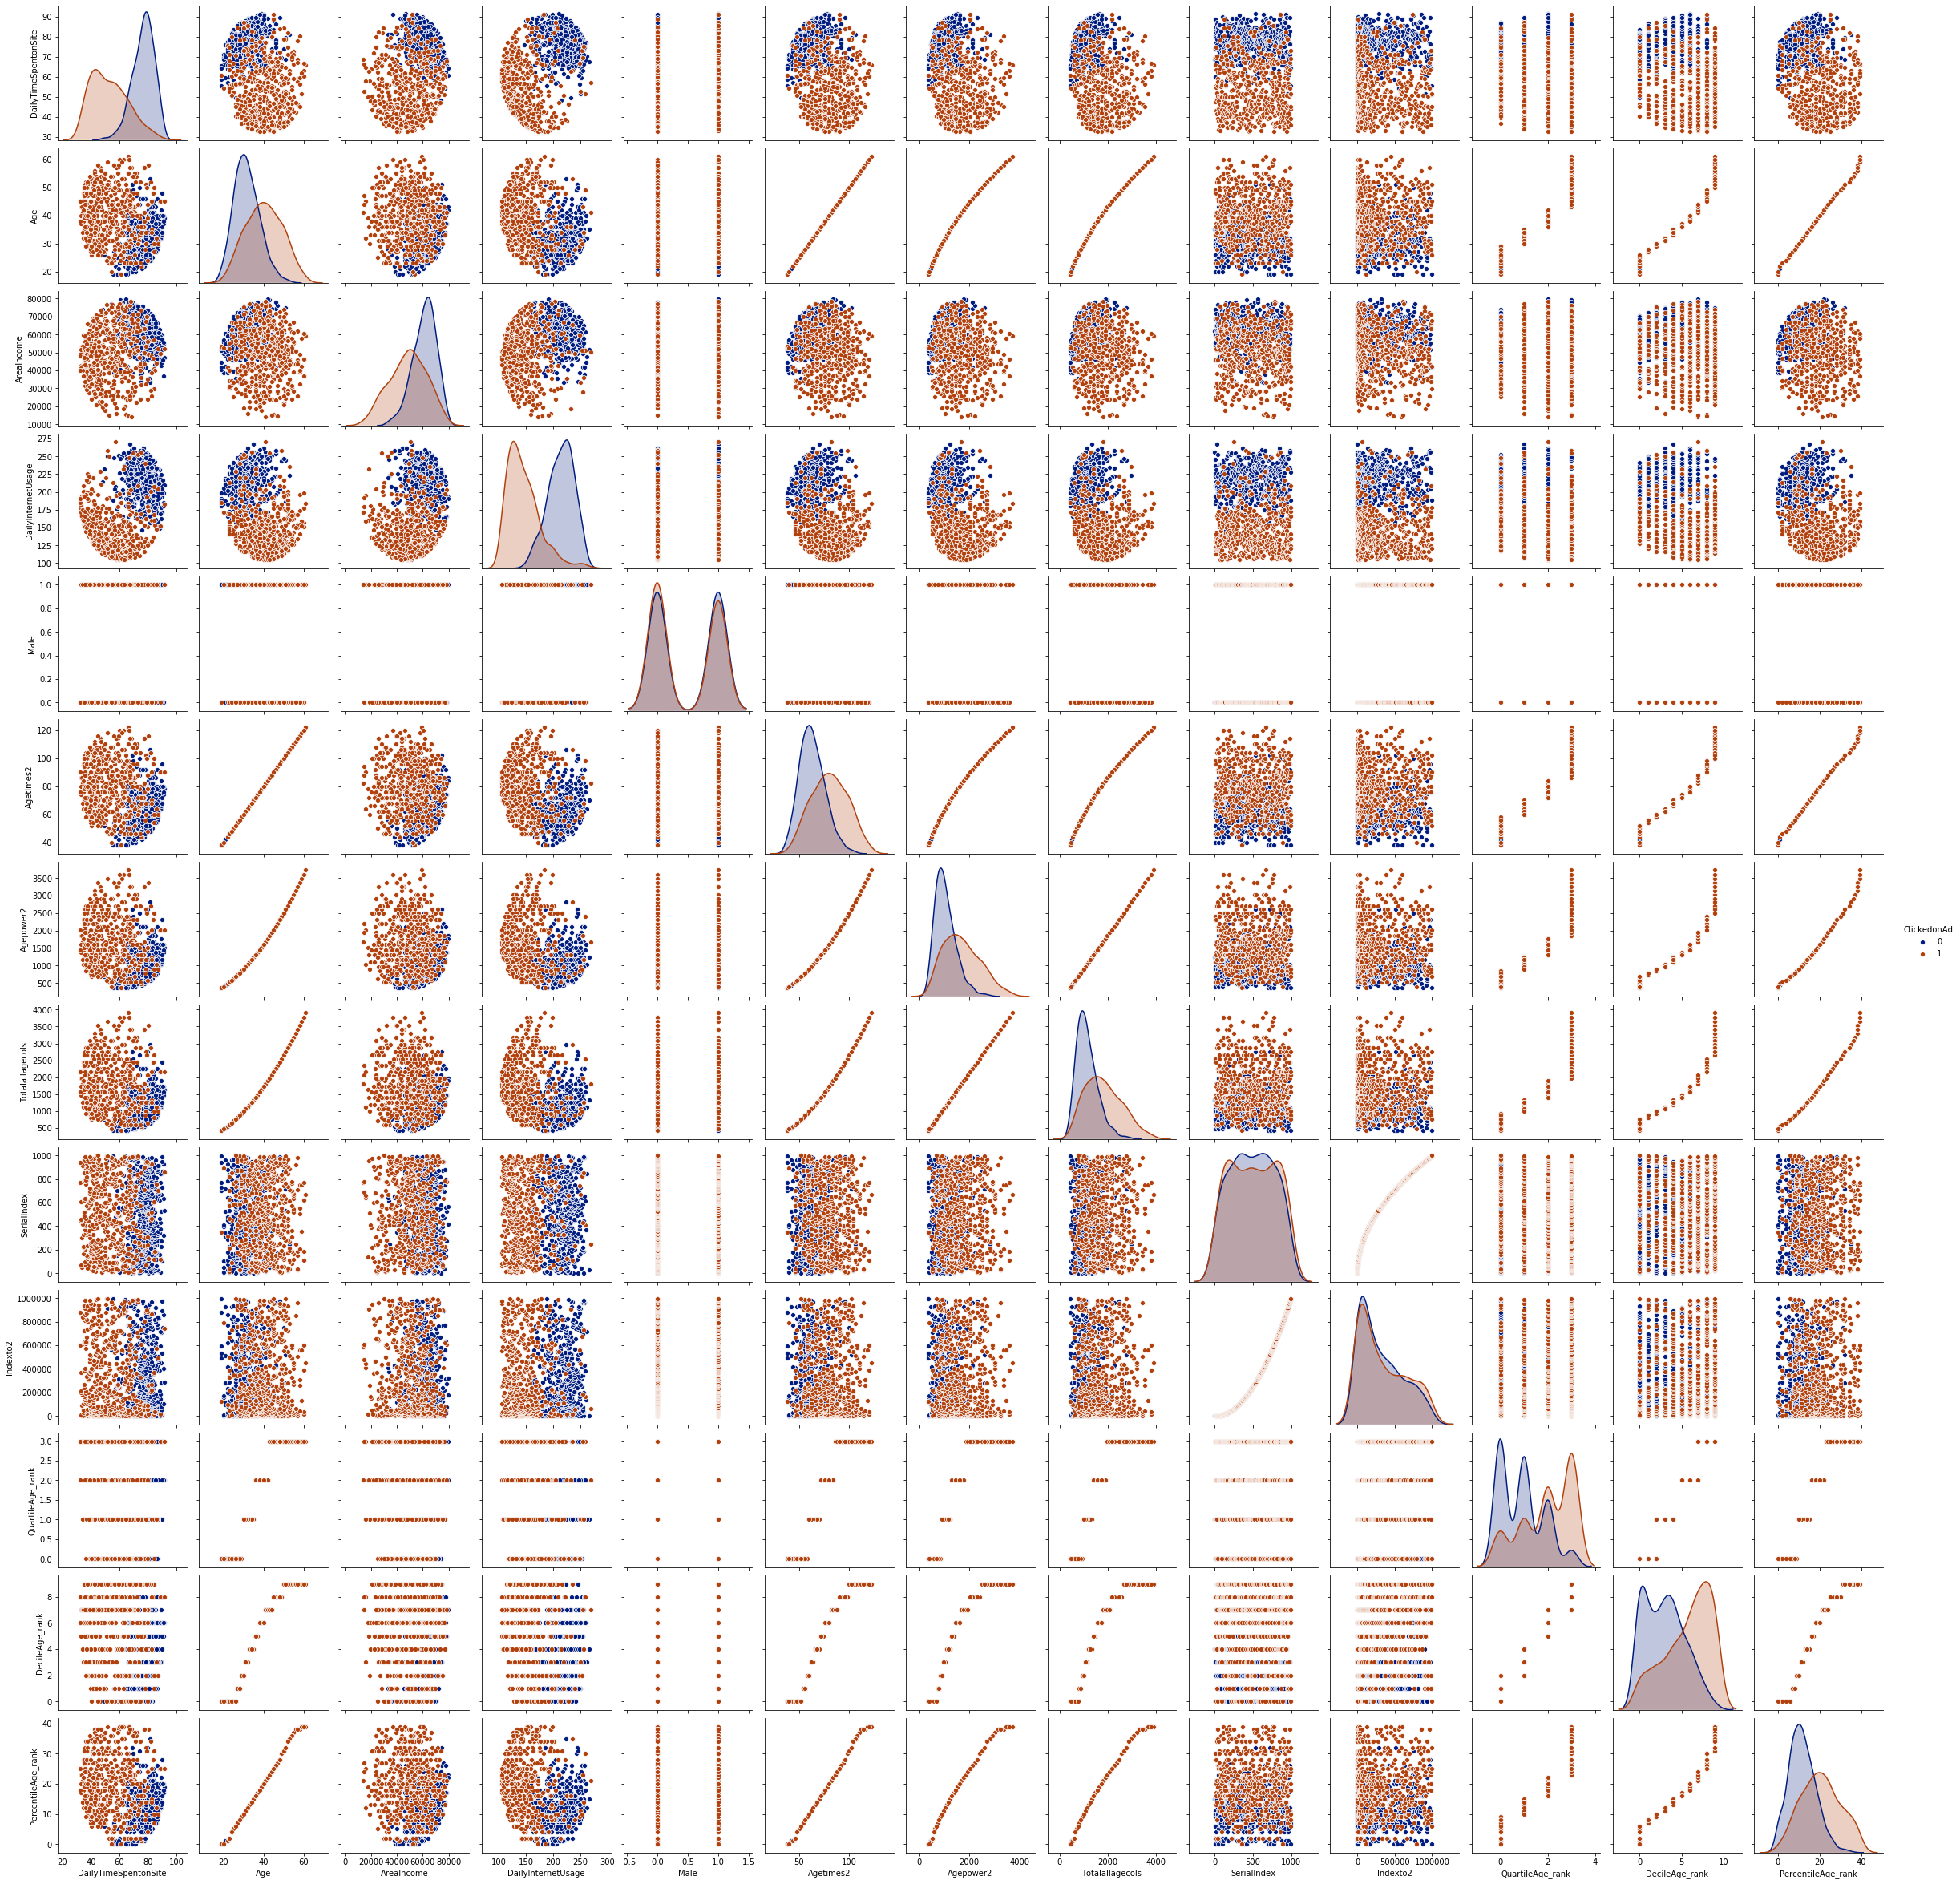

In [29]:
sns.pairplot(advertisingdf, hue = 'ClickedonAd', palette='dark')

# Using MatPlotLib

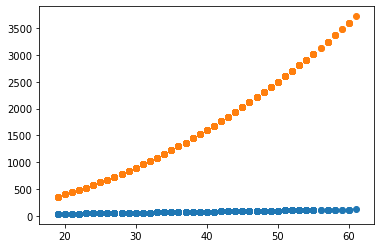

In [30]:
plt.scatter(advertisingdf['Age'],advertisingdf['Agetimes2'])
plt.scatter(advertisingdf['Age'],advertisingdf['Agepower2'])

(array([ 50., 118., 195., 159., 153., 138.,  77.,  65.,  28.,  17.]),
 array([19. , 23.2, 27.4, 31.6, 35.8, 40. , 44.2, 48.4, 52.6, 56.8, 61. ]),
 <a list of 10 Patch objects>)

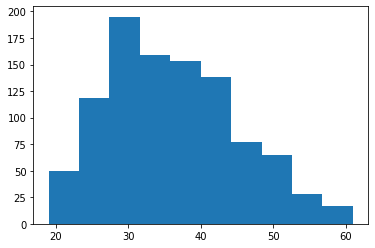

In [31]:
plt.hist(advertisingdf['Age'])

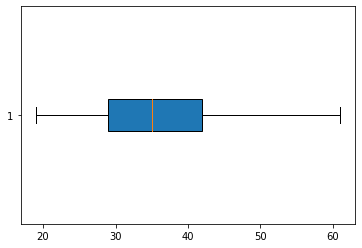

In [32]:
plt.boxplot(advertisingdf['Age'],vert=False,patch_artist=True);

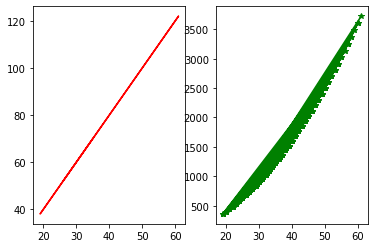

In [33]:
plt.subplot(1,2,1)
plt.plot(advertisingdf['Age'],advertisingdf['Agetimes2'], 'r') # More on color options later
plt.subplot(1,2,2)
plt.plot(advertisingdf['Age'],advertisingdf['Agepower2'], 'g*-');

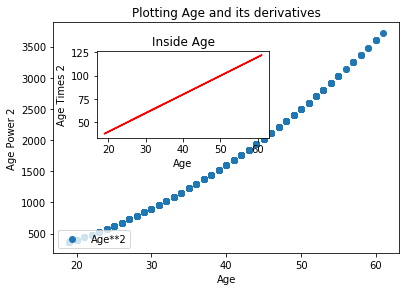

In [34]:
# Creates blank canvas. 2 Graphs 1 inside other
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes x1, y1 and x2, y2
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.scatter(advertisingdf['Age'], advertisingdf['Agepower2'],label="Age**2")
axes1.set_xlabel('Age')
axes1.set_ylabel('Age Power 2')

axes1.set_title('Plotting Age and its derivatives')
axes1.legend(loc=3) ##optimal - 0, upper right corner, # upper left corner, # lower right corner, # lower left corner

# Insert Figure Axes 2
axes2.plot(advertisingdf['Age'], advertisingdf['Agetimes2'], 'r')
axes2.set_xlabel('Age')
axes2.set_ylabel('Age Times 2')
axes2.set_title('Inside Age');

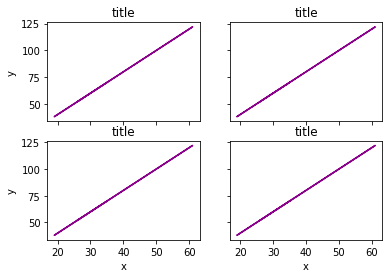

In [35]:
#Multiple Sub plots
rows = 2
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols) #Can Use Unpacking as well fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

for row in range(rows):
    for col in range(cols):
        axes[row, col].plot(advertisingdf['Age'],advertisingdf['Agetimes2'], color="#8B008B")
        axes[row, col].set_xlabel('x')
        axes[row, col].set_ylabel('y')
        axes[row, col].set_title('title')
        axes[row, col].label_outer()
# Display the figure object    
#fig
#plt.tight_layout()

#Save Graphs to png files
#fig.savefig("filename.png")


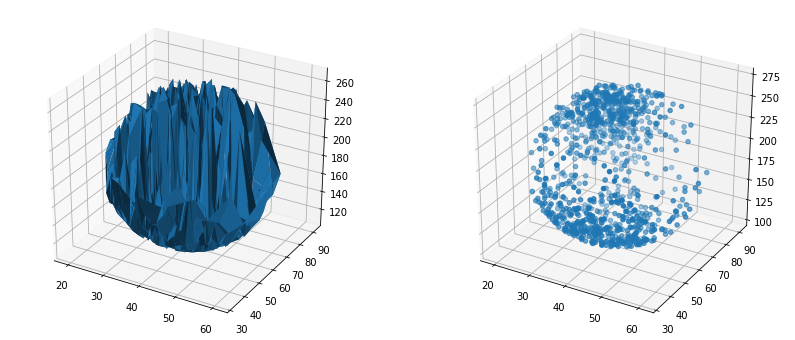

In [36]:
## 3D figures
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_trisurf(advertisingdf['Age'], advertisingdf['DailyTimeSpentonSite'], advertisingdf['DailyInternetUsage']) 
#p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0) #Plot surface requires Z to be 2 dimensional

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.scatter(advertisingdf['Age'], advertisingdf['DailyTimeSpentonSite'], advertisingdf['DailyInternetUsage'])

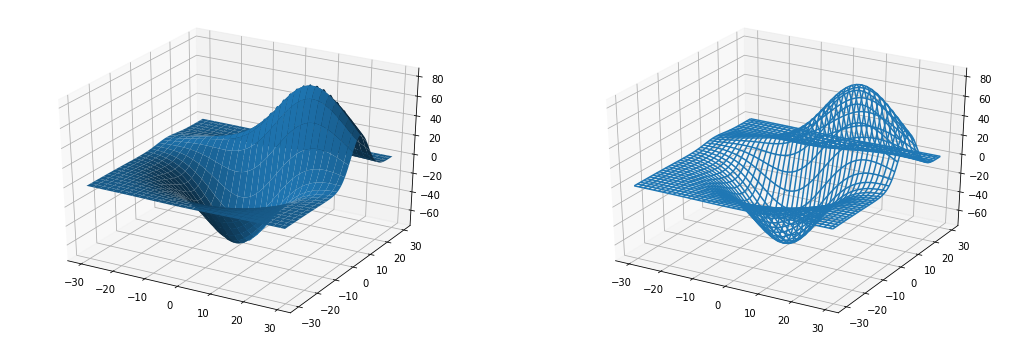

In [37]:
X, Y, Z = axes3d.get_test_data(0.05)
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0) #Plot surface requires Z to be 2 dimensional

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_wireframe(X, Y, Z)